<a href="https://colab.research.google.com/github/dhyannn/predictive-analytics/blob/main/PA_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/content/Online Retail.csv')

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


# Q1. Data Cleaning and Preparation

Q1.1


In [11]:
df.shape

(541909, 8)

In [9]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [14]:
# Handling missing values
df = df.dropna(subset=['Description','CustomerID'])

In [15]:
df = df.drop_duplicates()

In [16]:
#Filter irrelevant data (remove rows with negative Quantity or UnitPrice)
data = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [17]:
print(f"Cleaned dataset size: {data.shape[0]} rows, {data.shape[1]} columns")


Cleaned dataset size: 392692 rows, 8 columns


Cleaned the dataset by handling missing values, removing duplicates, and filtering out irrelevant data such as negative quantities. This ensures that the analysis is based on accurate and relevant data.

Q1.2

In [18]:
# Converting InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Descriptive statistics
print(data[['Quantity', 'UnitPrice']].describe())
print(data['InvoiceDate'].describe())

<ipython-input-18-86920c289d2b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


            Quantity      UnitPrice
count  392692.000000  392692.000000
mean       13.119702       3.125914
std       180.492832      22.241836
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000
count                           392692
mean     2011-07-10 19:13:07.771892480
min                2010-12-01 08:26:00
25%                2011-04-07 11:12:00
50%                2011-07-31 12:02:00
75%                2011-10-20 12:53:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object


<ipython-input-18-86920c289d2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


# Q2. Sales Analysis

Q2.1: Top 10 Best-Selling Products by Quantity

In [21]:
top_10_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_10_products)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


Identified the top 10 best-selling products by quantity. This highlights the product "PAPER CRAFT , LITTLE BIRDIE" with the highest sales volume and can inform inventory and marketing strategies.

Q2.2: Total Revenue per Product

In [24]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']

<ipython-input-24-63b0504ed4cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Quantity'] * data['UnitPrice']


Q2.3: Monthly revenue trend

<ipython-input-27-359cddb2813f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Revenue'] = data['Quantity'] * data['UnitPrice']
<ipython-input-27-359cddb2813f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
<ipython-input-27-359cddb2813f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

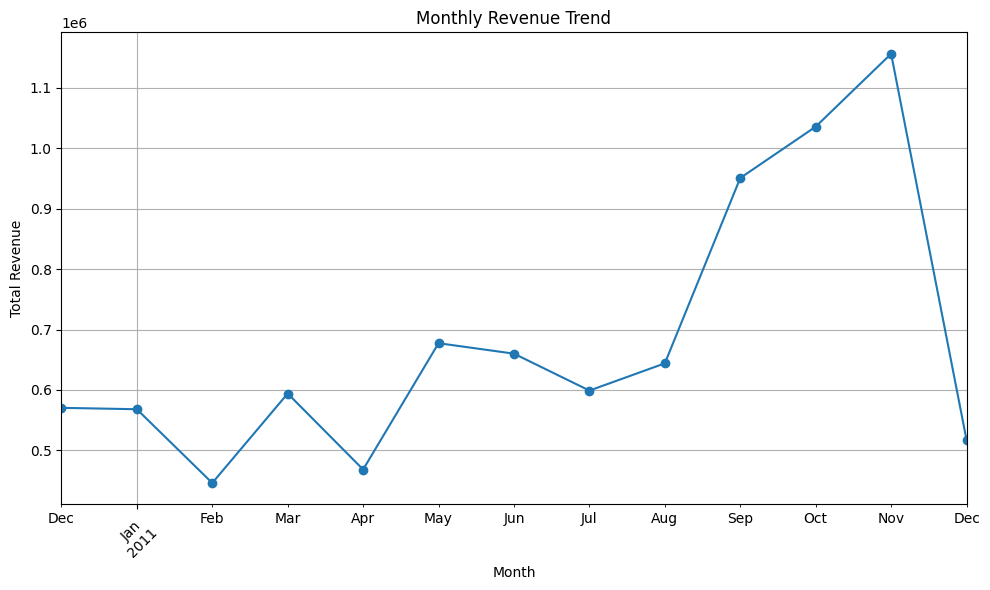

In [27]:
import matplotlib.pyplot as plt

# Step 1: Calculate Revenue
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# Step 2: Extract Year and Month from InvoiceDate
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')  # Extracting year and month in 'YYYY-MM' format

# Step 3: Group by Year-Month and Calculate Total Revenue per Month
monthly_revenue = data.groupby('YearMonth')['Revenue'].sum()

# Step 4: Visualize the Monthly Revenue Trend
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Analyzed the monthly revenue trend to identify patterns or peaks. This can reveal seasonal trends and help in forecasting and planning.
We can understand that there is peaks from September to November

# Q3. Customer Behaviour

Q3.1: How many unique customers are there in the dataset? What percentage of sales
is driven by repeat customers?

In [28]:
# Number of unique customers
unique_customers = data['CustomerID'].nunique()
print(f"Total unique customers: {unique_customers}")

repeat_customers = data.groupby('CustomerID').filter(lambda x: len(x) > 1)
repeat_customers_sales = repeat_customers['Revenue'].sum()

# Total sales in the dataset
total_sales = data['Revenue'].sum()

# Percentage of sales from repeat customers
percentage_repeat_sales = (repeat_customers_sales / total_sales) * 100
print(f"Percentage of sales driven by repeat customers: {percentage_repeat_sales:.2f}%")

Total unique customers: 4338
Percentage of sales driven by repeat customers: 98.90%


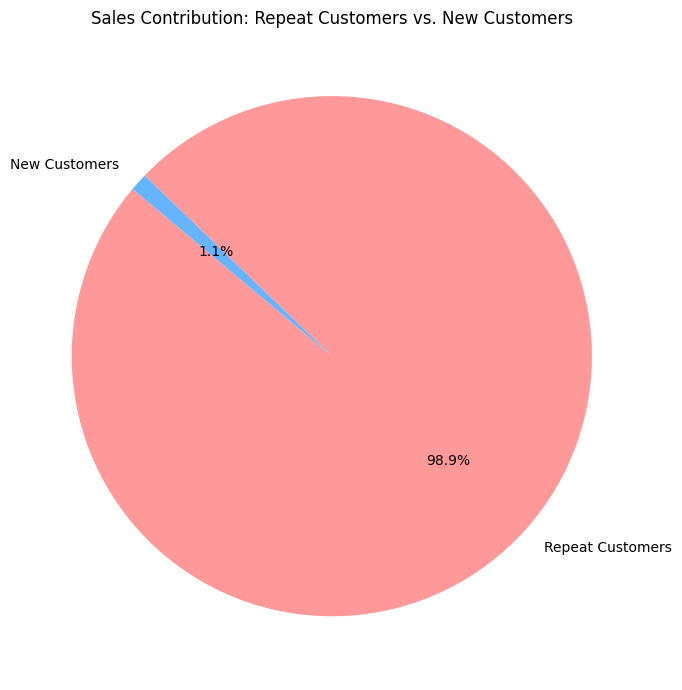

In [32]:
# Pie chart for repeat vs. new customers' contribution to total sales
repeat_customers_sales = repeat_customers['Revenue'].sum()
new_customers_sales = total_sales - repeat_customers_sales

labels = ['Repeat Customers', 'New Customers']
sizes = [repeat_customers_sales, new_customers_sales]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sales Contribution: Repeat Customers vs. New Customers')
plt.axis('equal')
plt.tight_layout()
plt.show()

Q3.2: What is the average order value (total sales per invoice)? How does this vary
across different customer segments?

It computes the average order value (total sales per invoice) and how it varies across different countries.

In [29]:
#Calculate total sales per invoice (AOV)
invoice_sales = data.groupby('InvoiceNo')['Revenue'].sum()

#Calculate overall average order value
average_order_value = invoice_sales.mean()
print(f"Average Order Value (AOV): {average_order_value:.2f}")

#Calculate AOV per country
country_aov = data.groupby('Country').apply(lambda x: x.groupby('InvoiceNo')['Revenue'].sum().mean())
print("Average Order Value by Country:")
print(country_aov.sort_values(ascending=False))

Average Order Value (AOV): 479.56
Average Order Value by Country:
Country
Singapore               3039.898571
Netherlands             3036.663191
Australia               2429.014211
Japan                   1969.282632
Lebanon                 1693.880000
Israel                  1443.168000
Brazil                  1143.600000
Switzerland             1106.744118
Sweden                  1065.773056
Denmark                 1053.074444
EIRE                    1020.240231
Norway                  1004.595556
RSA                     1002.310000
Greece                   952.104000
Cyprus                   843.928125
Channel Islands          786.174615
USA                      716.078000
Spain                    683.984000
United Arab Emirates     634.093333
Iceland                  615.714286
Canada                   611.063333
Austria                  599.922353
Portugal                 585.541053
Finland                  549.904390
Malta                    545.118000
France                   5

Q3.3: Which countries contribute the most to sales revenue?

In [30]:
#Calculate total revenue by country
country_revenue = data.groupby('Country')['Revenue'].sum()

#Identify top countries by revenue
top_countries_by_revenue = country_revenue.sort_values(ascending=False)
print("Top countries by total sales revenue:")
print(top_countries_by_revenue.head(10))

Top countries by total sales revenue:
Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: Revenue, dtype: float64


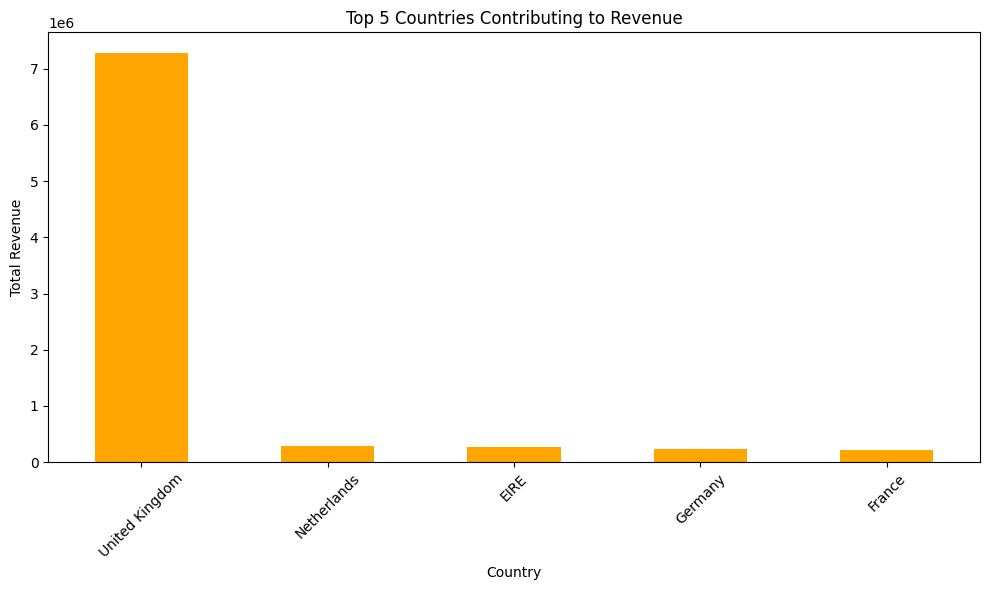

In [31]:
# Top 5 Countries by Revenue
top_countries = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(5)

# Plotting the Top 5 Countries by Revenue
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='orange')
plt.title('Top 5 Countries Contributing to Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Calculate total revenue per customer
customer_revenue = data.groupby('CustomerID')['Revenue'].sum()

# Sort customers by total revenue in descending order
top_10_customers = customer_revenue.sort_values(ascending=False).head(10)

# Print the top 10 customers and their total revenue
print("Top 10 Customers by Total Revenue:")
print(top_10_customers)

Top 10 Customers by Total Revenue:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: Revenue, dtype: float64


# Q4. Product Performance

Q4.1: What are the top 5 countries with the highest average revenue per transaction?

By calculating the average revenue per transaction, you can identify countries where customers tend to spend more per order.

In [33]:
# Step 1: Calculate total revenue per transaction (InvoiceNo)
transaction_revenue = data.groupby('InvoiceNo')['Revenue'].sum()

# Step 2: Merge transaction revenue back with the original dataset to get country information
data_with_revenue = data[['InvoiceNo', 'Country']].drop_duplicates().merge(transaction_revenue, on='InvoiceNo')

# Step 3: Calculate average revenue per transaction by country
country_avg_revenue = data_with_revenue.groupby('Country')['Revenue'].mean()

# Step 4: Get the top 5 countries with the highest average revenue per transaction
top_5_countries_avg_revenue = country_avg_revenue.sort_values(ascending=False).head(5)
print("Top 5 Countries with Highest Average Revenue per Transaction:")
print(top_5_countries_avg_revenue)

Top 5 Countries with Highest Average Revenue per Transaction:
Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Name: Revenue, dtype: float64


Q4.2: Investigate if there are any specific months or seasons when certain products
perform particularly well.

Top 10 Best-Selling Products:
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


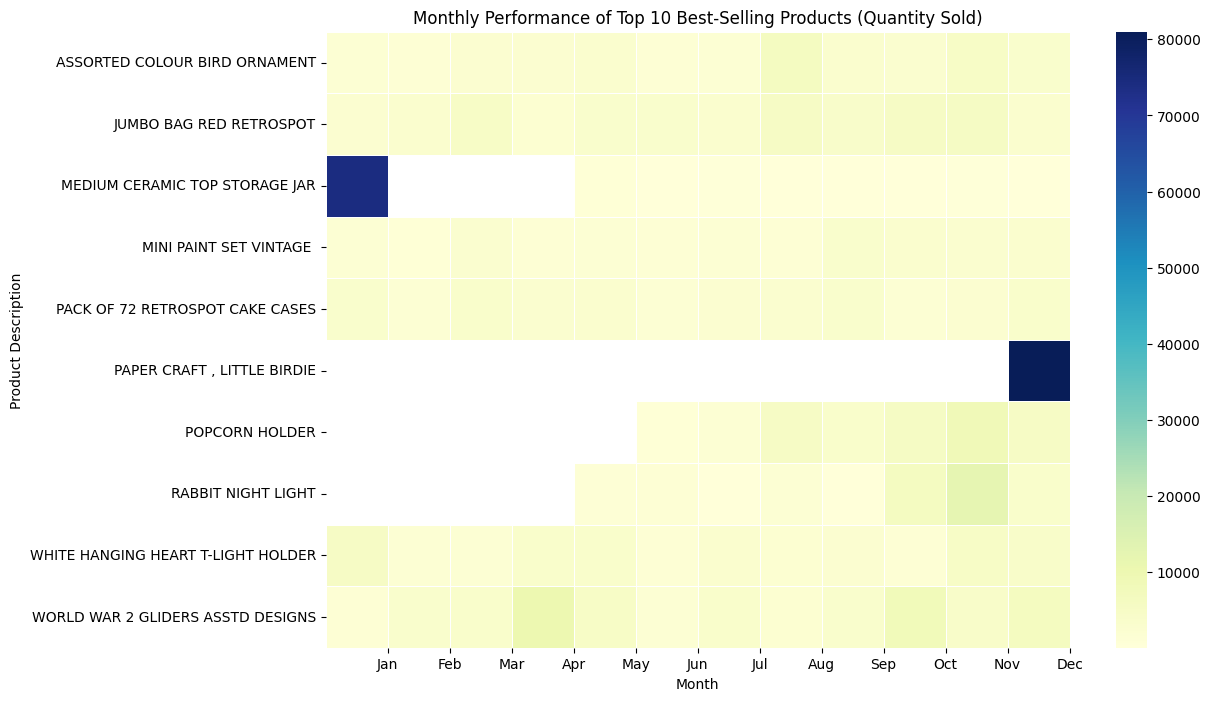

In [35]:
# Top 10 best-selling products
top_10_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:")
print(top_10_products)

# Step 1: Filter data for the top 10 best-selling products
top_10_product_descriptions = top_10_products.index
filtered_data = data[data['Description'].isin(top_10_product_descriptions)]

# Step 2: Group by product (Description) and month to sum quantities sold
monthly_sales_top_products = filtered_data.groupby(['Description', 'Month'])['Quantity'].sum().unstack()

# Step 3: Visualize the monthly performance of top 10 products
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales_top_products, cmap="YlGnBu", linewidths=.5)
plt.title('Monthly Performance of Top 10 Best-Selling Products (Quantity Sold)')
plt.xlabel('Month')
plt.ylabel('Product Description')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
